# ASTR 5490 Homework 4

In [1]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from Blackbody import SED
from scipy.integrate import quad
from MathTools import EquilTemp
from MaxwellBoltzmann import MaxwellBoltzmann
from ReadFile import ReadBandpass

# Reload scripts I may have changed
%load_ext autoreload
%autoreload 2

# 1) Create a blackbody spectral energy distribution for a star like the sun with $T_{eff}=5780 K$ and $1 R_{\odot}$. Include wavelengths between the X-ray (1 angs) and far infrared (100 $\mu m$) [$10^{-10}m$ to $ 10^{-4}m$]
## <center> $B_{\lambda}(T)=\frac{2hc^2}{\lambda^5}\frac{1}{\left(e^{\frac{hc}{\lambda kT}}-1\right)} \bigg\vert B_{\nu}(T) =\frac{2h\nu^3}{c^2}\frac{1}{\left(e^{\frac{h\nu}{kT}}-1\right)}$ </center>

## 1a) Plot this SED.  Integrate it over wavelength and multiply by the surface area of the sun ($4\pi R_{\odot}^2$) and another factor of $\pi$ (the angular integral over azimuthal and polar angle) and verify that you recover the luminosity of the sun: $4\pi R^2 \sigma T^4  = 2\cdot10^{33} \frac{erg}{s}$
## <center> $L_{\nu,\lambda}=4\pi^2R_{*}^2B_{\nu,\lambda}$ </center>
## 1b) What fraction of the energy is emitted shorter than the peak versus longer than the peak?

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Luminosity = 1.006 Lsun
24.91% of energy emitted below peak
75.03% of energy emitted above peak 

Program took 8.22 sec to run


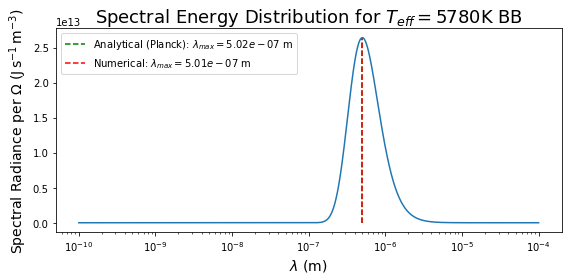

In [20]:
Sun_like = SED('wavelen','planck')
luminosity_1a = Sun_like.SEDStar(True)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Luminosity = 1.006 Lsun
31.41% of energy emitted below peak
65.88% of energy emitted above peak 

Program took 8.15 sec to run


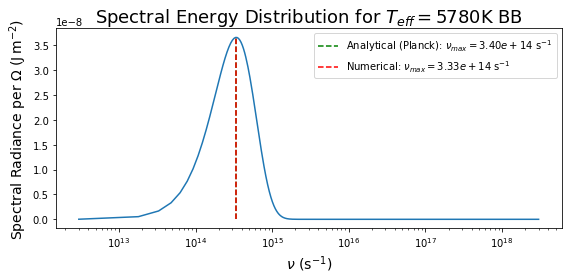

In [19]:
Sun_like_freq = SED('freq','planck')
luminosity_1a_2 = Sun_like_freq.SEDStar(True)

### The units on the y-axis of my frequency Planck function are correct, the s and Hz in the denominatior just cancel out in the calculation with astropy units

## 1c) Spectral energy distributions in astronomy are often plotted as $\nu L_{\nu}$ on the y-axis versus $\nu$ on the x axis because the total energy scales as $\nu$ (i.e., $E=h\nu$). Make such an SED and compare it to $L_{\nu}$ on the y-axis versus $\nu$. What changes?

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 8.02 sec to run


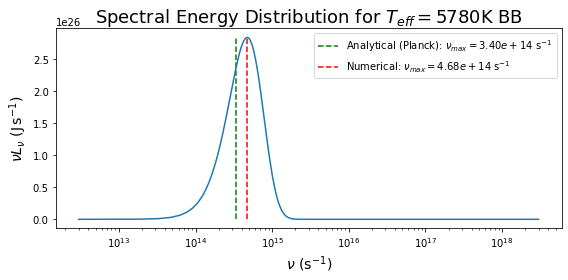

In [3]:
# Plot nu*L_nu vs. nu
plot_a_1c = SED('freq','xvar_luminos')
xdata_a,ydata_a = plot_a_1c.SEDStar(True)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 7.93 sec to run


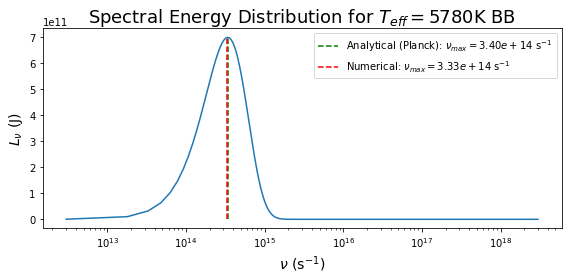

In [4]:
# Plot L_nu vs. nu
plot_b_1c = SED('freq','luminosity')
xdata_b,ydata_b = plot_b_1c.SEDStar(True)

### The plot of $\nu L_{\nu}$ is narrower arround the peak frequency than the $L_{\nu}$ plot. Also, the $\nu L_{\nu}$ plot peaks further from the peak Planck frequency than the plot of just $L_{\nu}$ does.

## 1d) Create an SED that consists of two components: a sun-like blackbody and a hot super-Jupiter with radius $R=3R_{Jup}$ at 0.05 au from the star. Plot each component separately.  Plot the contrast ratio, the ratio of $L_{\lambda}$ (or $L_{\nu}$) versus wavelength (or frequency)  to illustrate where this contrast ratio peaks.

Body Temperature = 1048.14 K


/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Program took 8.01 sec to run


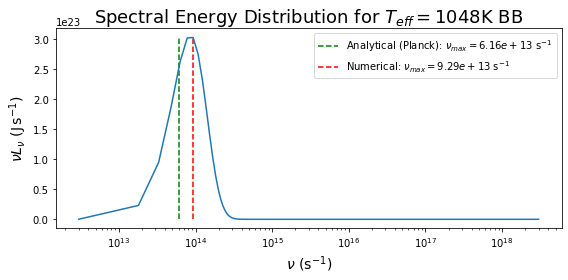

In [5]:
# Calculate temperature of hot super-Jupiter (HSJ)
T_HSJ = EquilTemp(0.5,1.0*const.R_sun,0.05*u.au,5780)
HSJ_SED = SED('freq','xvar_luminos',Teff=T_HSJ)
x_HSJ, y_HSJ = HSJ_SED.SEDStar(True)

/usr/local/Anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


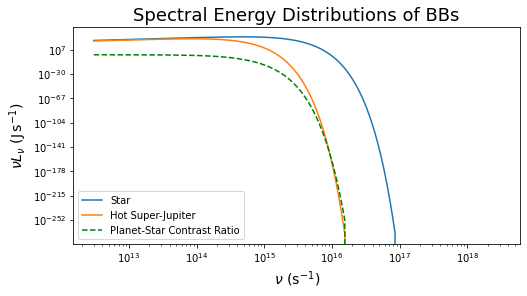

In [14]:
# Plotting SED components separately
plt.figure(figsize=(8,4))
plt.plot(xdata_a,ydata_a,label='Star') # plot SED of Sun-like star
plt.plot(x_HSJ,y_HSJ,label='Hot Super-Jupiter') # plot SED of hot super-Jupiter
contrast_ratio = np.divide(y_HSJ,ydata_a)
plt.plot(x_HSJ,contrast_ratio,label='Planet-Star Contrast Ratio',linestyle='dashed',color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\nu$ ({0:latex_inline})'.format(x_HSJ.unit),fontsize=14)
plt.ylabel(r'$\nu L_{{\nu}}$ ({0:latex_inline})'.format(y_HSJ.unit),fontsize=14)
plt.title('Spectral Energy Distributions of BBs',fontsize=18)
plt.legend()

### The contrast ratio peaks at shorter wavelengths near the far-infrared. This agrees with our previous discussions in this class about direct imaging needing to be done in the infrared as this is where the planet is most visible in front of the star.

## 1e) Fold (that is, multiply the $F_\nu$ by the efficiency at each wavelength and integrate over the bandpass) the SED of the sun (working in frequency units) through each bandpass (Kepler broad optical band and the 4.5 micron Spitzer band) to add up the energy that would be observed in each bandpass. 
## Compare the magnitude difference to the approximate V-W2 color from Pecaut & Mamajek (2013, ApJS, 208, 9) for a solar type star
## <center> $\Delta m=-2.5log\left(\frac{F(Kp)}{F(4.5)}\right)$ </center>
## Do the same for the super-Jupiter to find how many magnitudes of difference there are between the host star and planet at each wavelength.

In [66]:
# Extract frequencies and efficiences from Kepler bandpass data
Kepler_freq, Kepler_effic = ReadBandpass('Bandpass_Kepler.dat','freq')

In [67]:
# Extract frequencies and efficiences from Spitzer 4.5um bandpass data
Spitzer_freq, Spitzer_effic = ReadBandpass('Bandpass_SpitzerI2_4.5microns.dat','freq')

In [69]:
# Make master list of freq and effic
bandpass_freq, bandpass_effic = np.append(Kepler_freq,Spitzer_freq), np.append(Kepler_effic,Spitzer_effic)
print(bandpass_freq)

[8.61472580e+11 8.59004178e+11 8.56549880e+11 ... 5.75253974e+13
 5.74676153e+13 5.74097293e+13] 1 / s


# 2) Maxwell-Boltzmann Distributions

## 2a) Plot a Maxwell-Boltzmann distribution of speeds for He in the Earth’s atmosphere.  Integrate this distribution between the $v_{esc}$ for Earth and $v=\infty$ to find what fraction of He atoms at any given time have speeds greater than escape velocity.  Do the same for molecular nitrogen and compare fractions

7.36e-50% of He atoms exceed escape velocity of Earth at T=250.0 K
Program took 0.09 sec to run


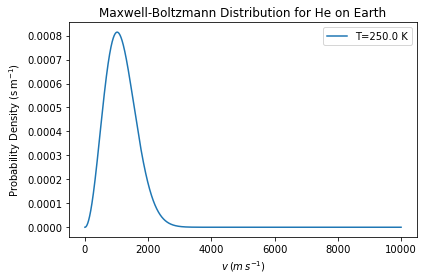

In [28]:
# Plot MB dist. for He at T=250K on Earth
He_dist = MaxwellBoltzmann(4,250.0,'He')
speeds, He_probs = He_dist.MBDistribution('Earth')

### $7.36\cdot10^{-50}\%$ of He atoms exceed escape velocity of Earth at T=250.0 K. This chance is much higher than for $N_2$ which makes sense since He is only a trace element in the atmosphere and is 7x less massive than $N_2$ so it can reach higher speeds more easily.

0.00e+00% of N2 atoms exceed escape velocity of Earth at T=250.0 K
Program took 0.07 sec to run


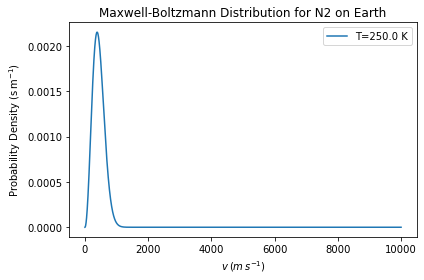

In [22]:
# Plot MB dist. for N at T=250K on Earth
N_dist = MaxwellBoltzmann(28,250.0,'N2')
speeds, N_probs = N_dist.MBDistribution('Earth')

### $0\%$ of $N_2$ atoms exceed escape velocity of Earth at T=250.0 K. This makes sense because most of the atmosphere is comprised of $N_2$ so we'd expect it's chance of escape at standard atmospheric temperatures to be extremely low

## 2b) Do the same thing for a hot $T=2000K$ Jupiter-sized planet, considering both atomic He and molecular CO.

1.73e-182% of He atoms exceed escape velocity of Jupiter at T=2000.0 K
Program took 0.11 sec to run


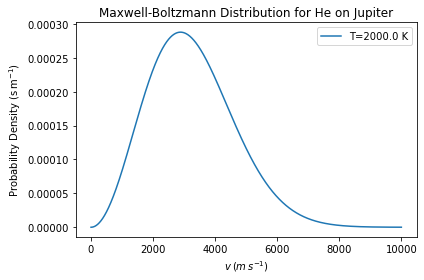

In [12]:
# Plot MB dist. for He at T=2000K on Jupiter
He_dist_Jup = MaxwellBoltzmann(4,2000.0,'He')
speeds, He_probs_Jup = He_dist_Jup.MBDistribution('Jupiter')

### $1.73\cdot10^{-182}\%\approx 0$ of He atoms exceed escape velocity of Jupiter at T=2000.0 K. Agrees with consensus that He is a major component of Jupiter's atmosphere

0.00e+00% of CO atoms exceed escape velocity of Jupiter at T=2000.0 K
Program took 0.08 sec to run


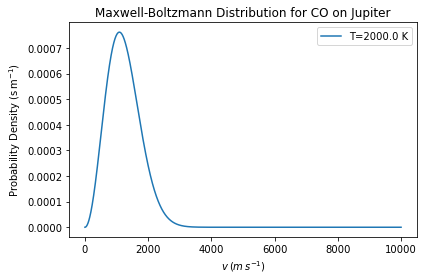

In [19]:
# Plot MB dist. for CO at T=2000K on Jupiter
CO_dist_Jup = MaxwellBoltzmann(28,2000.0,'CO')
speeds, CO_probs_Jup = CO_dist_Jup.MBDistribution('Jupiter')

### $0\%$ of CO atoms exceed escape velocity of Jupiter at T=2000.0 K. Presence of CO in Jupiter's atmosphere has been suggested to stem from meteoroid imacts that bring water which then gets converted to CO by various chemical processes (Prather, Logan, Mcelroy 2008 ApJ)
https://ui.adsabs.harvard.edu/abs/1978ApJ...223.1072P/abstract

# 3) Create a model of a protoplanetary debris disk system consisting of a central solar-type star and a disk of dust extending from the dust sublimation radius (where $T\sim2000 K$) to $1000 au$. Break the disk into thin rings of radius dr and compute the area of each ring and the temperature of each ring under the assumption of radiative equilibrium
## <center> $r_{sub}=\frac{R_*}{2}\sqrt{1-A}\left(\frac{T_{eff}}{T_{eq}}\right)^{2}$ for $T_{eq}=2000K$</center>

In [39]:
# Calculate the dust sublimation radius using radiative equilibrium temperature equation
r_sub = const.R_sun/2*np.sqrt(1-0.3)*(5780/2000)**2
print('r_sub = {0:.3f}'.format(r_sub.to(u.au)))

r_sub = 0.016 AU


## 3a) Take $1 M_{\oplus}$ of dust and spread it uniformly over the model protoplanetary disk. Take the mean mass of a spherical grain to be $M_{gr}=\frac{4\pi}{3} a^3 \rho_{gr}$ where the mean grain radius is $a=0.1 mm$ and the mean grain density is $\rho_{gr} = 2 g/cm^{3}$. The grain then radiates as a blackbody with that surface area. Given these grain parameters, compute a grain surface density in number of grains per area in each ring and add up the flux from each grain within each ring.  Plot the SED of the star, the disk, and the sum of the two.   What is the ratio of luminosity in the disk to the luminosity in the star?  